# Task: Analysis of the historical trajectory of the “angular/material"

## Step 1 - Import the packages and do some tests

In [2]:
var openDigger = require('../src/open_digger');

In [3]:
var query = openDigger.driver.clickhouse.query;

query(
    `SHOW DATABASES`
).then(res=>{ 
    console.log(res);
})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [162]:
// what's the years?

query(    
    `SHOW TABLES from github_log`
).then(res=>{    console.log(res);
            })

[
  { name: 'year2015' },
  { name: 'year2016' },
  { name: 'year2017' },
  { name: 'year2018' },
  { name: 'year2019' },
  { name: 'year2020' },
  { name: 'year2021' },
  { name: 'year2022' }
]


In [163]:
var year = 2022;
var limit = 10;
query(    `SELECT     anyHeavy(repo_name) as repo_name,     
COUNT(*) as cnt 
FROM github_log.year${year}     
GROUP BY repo_id     
ORDER BY cnt DESC     
LIMIT ${limit}`
     ).then(res=>{    console.log(res);});

[
  { repo_name: 'YTVanced/VancedManager', cnt: '2884' },
  { repo_name: 'dnSpy/dnSpy', cnt: '1379' },
  { repo_name: 'netchx/netch', cnt: '1308' },
  { repo_name: 'vmware/clarity', cnt: '1098' },
  { repo_name: 'h2y/Shadowrocket-ADBlock-Rules', cnt: '995' },
  { repo_name: 'GitSquared/edex-ui', cnt: '990' },
  { repo_name: 'helm/charts', cnt: '796' },
  { repo_name: 'PowerShellMafia/PowerSploit', cnt: '746' },
  { repo_name: 'DeviaVir/zenbot', cnt: '645' },
  { repo_name: 'CoatiSoftware/Sourcetrail', cnt: '586' }
]


In [164]:
// what columns do we have?

/*
omg, there are lots of attrs...
*/

var year = 2015;

var repo_name = "angular/material"

query(    
    `show create table  github_log.year${year}`
).then(res=>{    
    console.log(res)
});

query(    
    `select count(1) from github_log.year${year}`
).then(res=>{   
    console.log(res)
});


query(    
    `select type, action from github_log.year${year} group by type, action`
).then(res=>{   
    console.log(res)
});

[ { 'count(1)': '705558' } ]
[
  {
    statement: 'CREATE TABLE github_log.year2015\n' +
      '(\n' +
      '    `id` String,\n' +
      '    `type` String,\n' +
      '    `action` String,\n' +
      '    `actor_id` UInt64,\n' +
      '    `actor_login` String,\n' +
      '    `repo_id` UInt64,\n' +
      '    `repo_name` String,\n' +
      '    `org_id` UInt64,\n' +
      '    `org_login` String,\n' +
      '    `created_at` DateTime,\n' +
      '    `created_date` Date,\n' +
      '    `issue_id` UInt64,\n' +
      '    `issue_number` UInt32,\n' +
      '    `issue_title` String,\n' +
      '    `issue_body` String,\n' +
      '    `issue_labels.name` Array(String),\n' +
      '    `issue_labels.color` Array(String),\n' +
      '    `issue_labels.default` Array(UInt8),\n' +
      '    `issue_labels.description` Array(String),\n' +
      '    `issue_author_id` UInt64,\n' +
      '    `issue_author_login` String,\n' +
      '    `issue_author_type` String,\n' +
      '    `issue_auth

In [ ]:
// try it out!

// 注意clickhouse中的字符串要用单引号
var year = 2015;

// var repo_name = "angular/material"

var repo_name = 'dnSpy/dnSpy'

// query(    `SELECT distinct issue_id, (issue_closed_at - issue_created_at)/(60*60*24) as diff FROM github_log.year${year} where (repo_name == 'angular/material') and diff>0 limit 100`
//      ).then(res=>{    console.log(res);});

query(    
    `SELECT issue_comment_created_at FROM github_log.year${year} where (repo_name == 'angular/material') and toYear(issue_comment_created_at) > 1970 limit 100`
     ).then(res=>{    console.log(res);});

## Step 2 - Start the analysis task

In [52]:
// prepare the time array
var startYear = 2015, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) {
    years.push(y);
}

var startMonth = 1, endMonth = 12;
var months = [];
for (var m = startMonth; m <= endMonth; m++) {
    months.push(m);
}

// prepare the x-axis data 
var timeArray = []
for(var i = 0; i < years.length; i++) {
    for (var j = 0; j < months.length; j++) {
        timeArray.push(years[i].toString() + '-' + months[j].toString());
    }
}

// untill 2022-04
// timeArray = timeArray.slice(0, -8)
// 
console.log(timeArray)

[
  '2015-1', '2015-2', '2015-3', '2015-4',  '2015-5',  '2015-6',
  '2015-7', '2015-8', '2015-9', '2015-10', '2015-11', '2015-12',
  '2016-1', '2016-2', '2016-3', '2016-4',  '2016-5',  '2016-6',
  '2016-7', '2016-8', '2016-9', '2016-10', '2016-11', '2016-12',
  '2017-1', '2017-2', '2017-3', '2017-4',  '2017-5',  '2017-6',
  '2017-7', '2017-8', '2017-9', '2017-10', '2017-11', '2017-12',
  '2018-1', '2018-2', '2018-3', '2018-4',  '2018-5',  '2018-6',
  '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12',
  '2019-1', '2019-2', '2019-3', '2019-4',  '2019-5',  '2019-6',
  '2019-7', '2019-8', '2019-9', '2019-10', '2019-11', '2019-12',
  '2020-1', '2020-2', '2020-3', '2020-4',  '2020-5',  '2020-6',
  '2020-7', '2020-8', '2020-9', '2020-10', '2020-11', '2020-12',
  '2021-1', '2021-2', '2021-3', '2021-4',  '2021-5',  '2021-6',
  '2021-7', '2021-8', '2021-9', '2021-10', '2021-11', '2021-12',
  '2022-1', '2022-2', '2022-3', '2022-4',  '2022-5',  '2022-6',
  '2022-7', '2022-8', '2022-9',

###　1. How many stars / forks did it increase monthly?

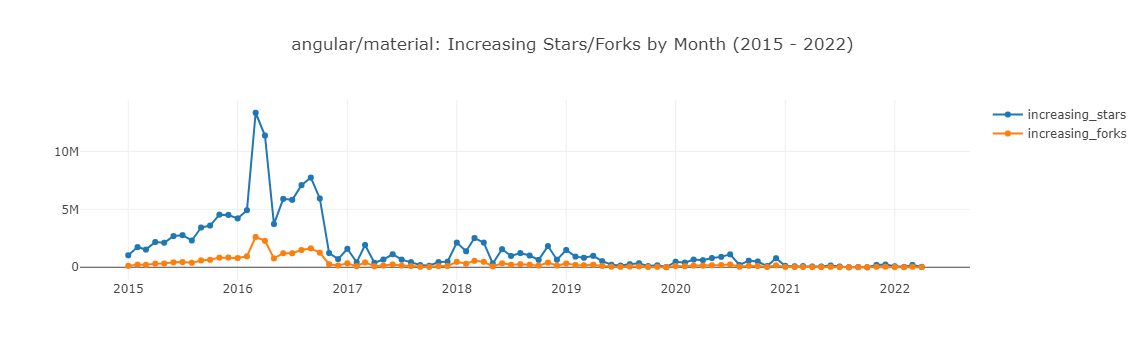

┌─────────┬───────────┬──────────────────┬──────────────────┐
│ (index) │   Time    │ Increasing Stars │ Increasing Forks │
├─────────┼───────────┼──────────────────┼──────────────────┤
│    0    │ '2015-1'  │    '1030900'     │     '121807'     │
│    1    │ '2015-2'  │    '1738968'     │     '221410'     │
│    2    │ '2015-3'  │    '1526531'     │     '207579'     │
│    3    │ '2015-4'  │    '2179099'     │     '309003'     │
│    4    │ '2015-5'  │    '2119406'     │     '319159'     │
│    5    │ '2015-6'  │    '2692467'     │     '422979'     │
│    6    │ '2015-7'  │    '2771769'     │     '448489'     │
│    7    │ '2015-8'  │    '2311417'     │     '388016'     │
│    8    │ '2015-9'  │    '3431055'     │     '589899'     │
│    9    │ '2015-10' │    '3600582'     │     '640283'     │
│   10    │ '2015-11' │    '4543522'     │     '829562'     │
│   11    │ '2015-12' │    '4518076'     │     '838056'     │
│   12    │ '2016-1'  │    '4218115'     │     '794518'     │
│   13  

In [78]:
Promise.all(years.map(year => {
    return query( 
        `SELECT sum(repo_stargazers_count) as increasing_stars, sum(repo_forks_count) as increasing_forks, toMonth(created_date) as month 
        FROM github_log.year${year} 
        where (repo_name == 'angular/material')
        group by toMonth(created_date)`
    );
})).then(data => {
    // 直接打印数据
    // console.log(data);  
    var increasing_stars = [], increasing_forks = [], tableArray = []
    data.forEach((year_data, i) => {
        year_data.forEach((d, j) => {
            increasing_stars.push(d.increasing_stars);
            increasing_forks.push(d.increasing_forks);
            tableArray.push({"Time": timeArray[i*12 + j], "Increasing Stars": d.increasing_stars,  "Increasing Forks": d.increasing_forks,})
        }) 
    })
   
    // 使用 Plotly 绘图
    plot_stars = {x: timeArray, y: increasing_stars, mode: 'lines+markers',  name: 'increasing_stars'}
    plot_forks = {x: timeArray, y: increasing_forks, mode: 'lines+markers',  name: 'increasing_forks'}
    figure_info = {
        title: `angular/material: Increasing Stars/Forks by Month (${startYear} - ${endYear})`, 
        // yaxis: {type: 'log'}
    }; 
    
    openDigger.render.plotly([plot_stars, plot_forks], figure_info)
         
    // 打印表格
    console.table(tableArray)
});

###　2. How many issues are opened / closed monthly?

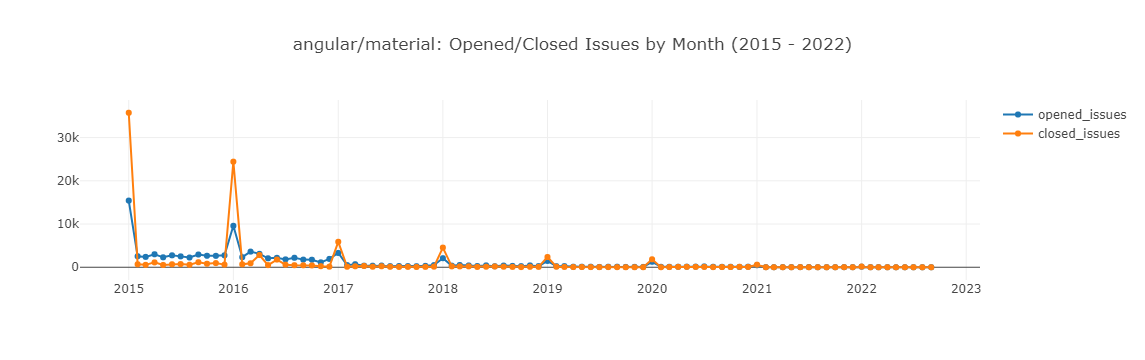

┌─────────┬───────────┬───────────────┬───────────────┐
│ (index) │   Time    │ Opened Issues │ Closed Issues │
├─────────┼───────────┼───────────────┼───────────────┤
│    0    │ '2015-1'  │    '15421'    │    '35741'    │
│    1    │ '2015-2'  │    '2538'     │     '686'     │
│    2    │ '2015-3'  │    '2397'     │     '553'     │
│    3    │ '2015-4'  │    '3005'     │    '1120'     │
│    4    │ '2015-5'  │    '2298'     │     '527'     │
│    5    │ '2015-6'  │    '2760'     │     '691'     │
│    6    │ '2015-7'  │    '2515'     │     '733'     │
│    7    │ '2015-8'  │    '2248'     │     '579'     │
│    8    │ '2015-9'  │    '2946'     │    '1158'     │
│    9    │ '2015-10' │    '2653'     │     '809'     │
│   10    │ '2015-11' │    '2637'     │     '959'     │
│   11    │ '2015-12' │    '2749'     │     '611'     │
│   12    │ '2016-1'  │    '9583'     │    '24426'    │
│   13    │ '2016-2'  │    '2326'     │     '678'     │
│   14    │ '2016-3'  │    '3620'     │     '917

In [55]:
Promise.all(years.map(year => {
    return query(
        `SELECT open_month as month, opened_issues, closed_issues
        FROM
        (SELECT distinct count(issue_id) as opened_issues, 
        toMonth(issue_created_at) as open_month 
        FROM github_log.year${year} 
        where (repo_name == 'angular/material')
        group by toMonth(issue_created_at)) open_info
        
        FULL OUTER JOIN
        
        (SELECT distinct count(issue_id) as closed_issues, 
        toMonth(issue_closed_at) as close_month 
        FROM github_log.year${year} 
        where (repo_name == 'angular/material')
        group by toMonth(issue_closed_at)) close_info
        
        ON open_info.open_month = close_info.close_month
        
        `
    );
})).then(data => {
    // 直接打印数据
    // console.log(data);  
    var opened_issues = [], closed_issues = [], tableArray = []
    data.forEach((year_data, i) => {
        year_data.forEach((d, j) => {
            opened_issues.push(d.opened_issues);
            closed_issues.push(d.closed_issues);
            tableArray.push({"Time": timeArray[i*12 + j], "Opened Issues": d.opened_issues,  "Closed Issues": d.closed_issues,})
        }) 
    })
   
    // 使用 Plotly 绘图
    plot_opened = {x: timeArray, y: opened_issues, mode: 'lines+markers',  name: 'opened_issues'}
    plot_closed = {x: timeArray, y: closed_issues, mode: 'lines+markers',  name: 'closed_issues'}
    figure_info = {
        title: `angular/material: Opened/Closed Issues by Month (${startYear} - ${endYear})`, 
        // yaxis: {type: 'log'}
    }; 
    
    openDigger.render.plotly([plot_opened, plot_closed], figure_info)
         
    // 打印表格
    console.table(tableArray)
});

### 3. How many PRs are opened / merged monthly?

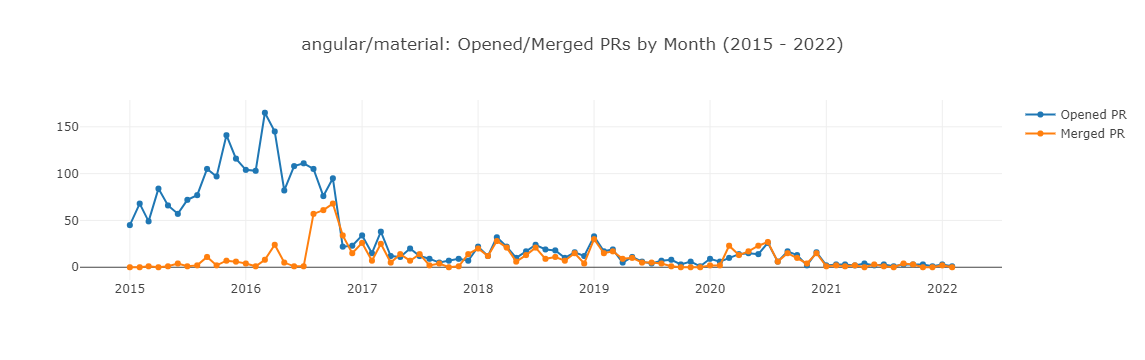

┌─────────┬───────────┬───────────┬───────────┐
│ (index) │   Time    │ Opened PR │ Merged PR │
├─────────┼───────────┼───────────┼───────────┤
│    0    │ '2015-1'  │   '45'    │    '0'    │
│    1    │ '2015-2'  │   '68'    │    '0'    │
│    2    │ '2015-3'  │   '49'    │    '1'    │
│    3    │ '2015-4'  │   '84'    │    '0'    │
│    4    │ '2015-5'  │   '66'    │    '1'    │
│    5    │ '2015-6'  │   '57'    │    '4'    │
│    6    │ '2015-7'  │   '72'    │    '1'    │
│    7    │ '2015-8'  │   '77'    │    '2'    │
│    8    │ '2015-9'  │   '105'   │   '11'    │
│    9    │ '2015-10' │   '97'    │    '2'    │
│   10    │ '2015-11' │   '141'   │    '7'    │
│   11    │ '2015-12' │   '116'   │    '6'    │
│   12    │ '2016-1'  │   '104'   │    '4'    │
│   13    │ '2016-2'  │   '103'   │    '1'    │
│   14    │ '2016-3'  │   '165'   │    '8'    │
│   15    │ '2016-4'  │   '145'   │   '24'    │
│   16    │ '2016-5'  │   '82'    │    '5'    │
│   17    │ '2016-6'  │   '108'   │    '

In [58]:
Promise.all(years.map(year => {
    return query(
        `SELECT open_month as month, pr_opened, pr_merged
        FROM
        (SELECT count(1) as pr_opened, toMonth(created_date) as open_month 
        FROM github_log.year${year} 
        where (repo_name == 'angular/material')
        AND type='PullRequestEvent' AND action='opened'
        group by toMonth(created_date)) open_info
        
        FULL OUTER JOIN
        
        (SELECT sum(pull_merged) as pr_merged, toMonth(created_date) as merge_month 
        FROM github_log.year${year} 
        where (repo_name == 'angular/material')
        AND type='PullRequestEvent'
        group by toMonth(created_date)) merge_info
        
        ON open_info.open_month = merge_info.merge_month
        
        `
    );
})).then(data => {
    // 直接打印数据
    // console.log(data);  
    var pr_opened = [], pr_merged = [], tableArray = []
    data.forEach((year_data, i) => {
        year_data.forEach((d, j) => {
            pr_opened.push(d.pr_opened);
            pr_merged.push(d.pr_merged);
            tableArray.push({"Time": timeArray[i*12 + j], "Opened PR": d.pr_opened,  "Merged PR": d.pr_merged})
        }) 
    })
   
    // 使用 Plotly 绘图
    plot_opened = {x: timeArray, y: pr_opened, mode: 'lines+markers',  name: 'Opened PR'}
    plot_merged = {x: timeArray, y: pr_merged, mode: 'lines+markers',  name: 'Merged PR'}
    figure_info = {
        title: `angular/material: Opened/Merged PRs by Month (${startYear} - ${endYear})`, 
        // yaxis: {type: 'log'}
    }; 
    
    openDigger.render.plotly([plot_opened, plot_merged], figure_info)
         
    // 打印表格
    console.table(tableArray)
});

### 4. Active Developers by month

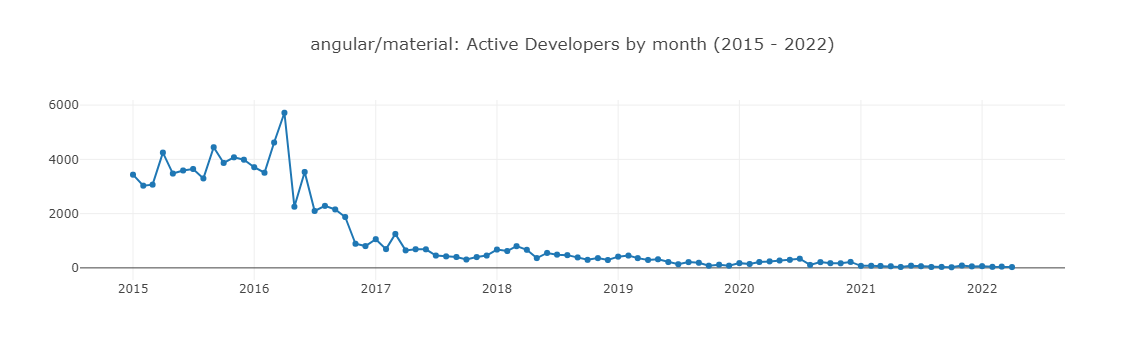

┌─────────┬───────────┬──────────────────┐
│ (index) │   Time    │ Active Developer │
├─────────┼───────────┼──────────────────┤
│    0    │ '2015-1'  │      '3435'      │
│    1    │ '2015-2'  │      '3030'      │
│    2    │ '2015-3'  │      '3068'      │
│    3    │ '2015-4'  │      '4249'      │
│    4    │ '2015-5'  │      '3476'      │
│    5    │ '2015-6'  │      '3590'      │
│    6    │ '2015-7'  │      '3645'      │
│    7    │ '2015-8'  │      '3297'      │
│    8    │ '2015-9'  │      '4447'      │
│    9    │ '2015-10' │      '3868'      │
│   10    │ '2015-11' │      '4075'      │
│   11    │ '2015-12' │      '3987'      │
│   12    │ '2016-1'  │      '3711'      │
│   13    │ '2016-2'  │      '3507'      │
│   14    │ '2016-3'  │      '4621'      │
│   15    │ '2016-4'  │      '5718'      │
│   16    │ '2016-5'  │      '2255'      │
│   17    │ '2016-6'  │      '3535'      │
│   18    │ '2016-7'  │      '2097'      │
│   19    │ '2016-8'  │      '2285'      │
│   20    │

In [84]:
Promise.all(years.map(year => {
    return query( 
         `SELECT distinct count(actor_id) as actived_developer, toMonth(created_date) as month
        FROM github_log.year${year} 
        where (repo_name == 'angular/material')
        group by toMonth(created_date)`
    );
})).then(data => {
    // 直接打印数据
    // console.log(data);  
    var actived_developer = [], tableArray = []
    data.forEach((year_data, i) => {
        year_data.forEach((d, j) => {
            actived_developer.push(d.actived_developer);
            tableArray.push({"Time": timeArray[i*12 + j], "Active Developer": d.actived_developer})
        }) 
    })
   
    // 使用 Plotly 绘图
    plot_ad = {x: timeArray, y: actived_developer, mode: 'lines+markers',  name: 'The Number of Active Developers'}
    figure_info = {
        title: `angular/material: Active Developers by month (${startYear} - ${endYear})`, 
        // yaxis: {type: 'log'}
    }; 
    
    openDigger.render.plotly([plot_ad], figure_info)
         
    // 打印表格
    console.table(tableArray)
});

### 5. Avg time & Median time about an issue from being opened / closed 

In [72]:
// use sub-sql and group by to filter duplicate lines 

function f5() {

    query(  
     `SELECT avg(issue_closed_at - issue_created_at)/(24*60*60) as issue_avg_time, median(issue_closed_at - issue_created_at)/(24*60*60) as issue_median_time
     FROM 
     (select issue_created_at,issue_closed_at from github_log.year2015 where repo_name == 'angular/material' and (issue_closed_at - issue_created_at) > 0 
     UNION ALL
     select issue_created_at,issue_closed_at from github_log.year2016 where repo_name == 'angular/material' and (issue_closed_at - issue_created_at) > 0
     UNION ALL
     select issue_created_at,issue_closed_at from github_log.year2017 where repo_name == 'angular/material' and (issue_closed_at - issue_created_at) > 0
     UNION ALL
     select issue_created_at,issue_closed_at from github_log.year2018 where repo_name == 'angular/material' and (issue_closed_at - issue_created_at) > 0
     UNION ALL
     select issue_created_at,issue_closed_at from github_log.year2019 where repo_name == 'angular/material' and (issue_closed_at - issue_created_at) > 0
     UNION ALL
     select issue_created_at,issue_closed_at from github_log.year2020 where repo_name == 'angular/material' and (issue_closed_at - issue_created_at) > 0
     UNION ALL
     select issue_created_at,issue_closed_at from github_log.year2021 where repo_name == 'angular/material' and (issue_closed_at - issue_created_at) > 0
     UNION ALL
     select issue_created_at,issue_closed_at from github_log.year2022 where repo_name == 'angular/material' and (issue_closed_at - issue_created_at) > 0
     )`
    ).then(data => {
        // console.log(data)
        console.log("Avg Time(Day): ", data[0].issue_avg_time)
        console.log("Median Time(Day): ", data[0].issue_median_time)
    })
    
};


f5()

Avg Time(Day):  96.93624032317274
Median Time(Day):  15.956747685185185


### 6. Avg time & Median time about an PR from being opened / merged

In [82]:

// use sub-sql and group by to filter duplicate lines 

// maybe lack the data of pr_create_by 


function f6() {

    query(  
     `SELECT avg(end_ - start_)/(24*60*60) as pr_avg_time, median(end_ - start_)/(24*60*60) as pr_median_time
     FROM 
     (
     select max(pull_merged_at) as end_, min(created_at) as start_ from github_log.year2015 where repo_name == 'angular/material' and type='PullRequestEvent'
     UNION ALL
     select max(pull_merged_at) as end_, min(created_at) as start_ from github_log.year2016 where repo_name == 'angular/material' and type='PullRequestEvent'
     UNION ALL
     select max(pull_merged_at) as end_, min(created_at) as start_ from github_log.year2017 where repo_name == 'angular/material' and type='PullRequestEvent'
     UNION ALL
     select max(pull_merged_at) as end_, min(created_at) as start_ from github_log.year2018 where repo_name == 'angular/material' and type='PullRequestEvent'
     UNION ALL
     select max(pull_merged_at) as end_, min(created_at) as start_ from github_log.year2019 where repo_name == 'angular/material' and type='PullRequestEvent'
     UNION ALL
     select max(pull_merged_at) as end_, min(created_at) as start_ from github_log.year2020 where repo_name == 'angular/material' and type='PullRequestEvent'
     UNION ALL
     select max(pull_merged_at) as end_, min(created_at) as start_ from github_log.year2021 where repo_name == 'angular/material' and type='PullRequestEvent'
     UNION ALL
     select max(pull_merged_at) as end_, min(created_at) as start_ from github_log.year2022 where repo_name == 'angular/material' and type='PullRequestEvent'
     )`
    ).then(data => {
        console.log(data)
        console.log("Avg Time(Day): ", data[0].pr_avg_time)
        console.log("Median Time(Day): ", data[0].pr_median_time)
    })
    
};

f6()

[
  {
    pr_avg_time: 304.5333796296296,
    pr_median_time: 347.63067708333335
  }
]
Avg Time(Day):  304.5333796296296
Median Time(Day):  347.63067708333335


### 7. Avg time & Median time about an PR/Issue from being opened to being replied by other replier not himself/herself.

In [81]:
// 7 Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

function f7(year) {
    query(  
     `SELECT avg(first_comment_at - issue_created_at)/(24*60*60) as issue_create_comment_avg_time, median(first_comment_at - issue_created_at)/(24*60*60) as issue_create_comment_median_time
     FROM 
     (select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at from github_log.year2015
         where repo_name == 'angular/material' and toYear(issue_created_at) > '1970' and toYear(issue_comment_created_at) > '1970' group by issue_id, issue_created_at 
      UNION ALL
      select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at from github_log.year2016
         where repo_name == 'angular/material' and toYear(issue_created_at) > '1970' and toYear(issue_comment_created_at) > '1970' group by issue_id, issue_created_at 
      UNION ALL
      select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at from github_log.year2017 
         where repo_name == 'angular/material' and toYear(issue_created_at) > '1970' and toYear(issue_comment_created_at) > '1970' group by issue_id, issue_created_at 
      UNION ALL
      select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at from github_log.year2018 
         where repo_name == 'angular/material' and toYear(issue_created_at) > '1970' and toYear(issue_comment_created_at) > '1970' group by issue_id, issue_created_at 
      UNION ALL
      select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at from github_log.year2019 
         where repo_name == 'angular/material' and toYear(issue_created_at) > '1970' and toYear(issue_comment_created_at) > '1970' group by issue_id, issue_created_at 
      UNION ALL
      select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at from github_log.year2020 
         where repo_name == 'angular/material' and toYear(issue_created_at) > '1970' and toYear(issue_comment_created_at) > '1970' group by issue_id, issue_created_at 
      UNION ALL 
      select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at from github_log.year2021 
         where repo_name == 'angular/material' and toYear(issue_created_at) > '1970' and toYear(issue_comment_created_at) > '1970' group by issue_id, issue_created_at 
      UNION ALL
      select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at from github_log.year2022 
         where repo_name == 'angular/material' and toYear(issue_created_at) > '1970' and toYear(issue_comment_created_at) > '1970' group by issue_id, issue_created_at 
     )`
    ).then(data => {
        console.log(data)
        console.log("Avg Time(Day): ", data[0].issue_create_comment_avg_time)
        console.log("Median Time(Day): ", data[0].issue_create_comment_median_time)
    })
};


f7()

[
  {
    issue_create_comment_avg_time: 161.20431941222188,
    issue_create_comment_median_time: 26.7034375
  }
]
Avg Time(Day):  161.20431941222188
Median Time(Day):  26.7034375
